In [808]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [805]:

def read_freq_table(filename, n_words):

    freq_dict = {}
    
    with open(filename, 'r') as file:
        for i,line in enumerate(file):
            line = line.strip()
            if not line:
                continue
            if (i==0):
                books = line.replace('"','').split()
                continue
            if (i == n_words+1):
                break
            parts = line.split()
            key = parts[0]
            key = key.replace('"',"")
            values = np.array(parts[1:]).astype(float)
            freq_dict[key] = values
    
    
    
    books_freq_vecs = {}
    
    
    for j,key in enumerate(freq_dict.keys()):
        for i in range(freq_dict[key].size):
            if (j == 0):
                books_freq_vecs[books[i]] = []
            books_freq_vecs[books[i]].append(freq_dict[key][i])

    return freq_dict,books_freq_vecs



def closest_pair_intersept(books_freq_sets,serie,serie_indexes,ind):
         
    """
    similarity between closest pair in series based on frequent words sets
    """
    
    for i in range(0,serie_length-1):
        diff = len(books_freq_sets[serie+serie_indexes[i]] - books_freq_sets[serie+serie_indexes[i+1]])
        set_difference.append(diff)
        
    return set_difference


def rs_series(books_freq_sets,serie,serie_indexes,ind):
    
    """
    AUTOCORR for books, based on frequent words sets
    """
    
    serie_indexes = ['01','02','03','04','05','06','07','08','09'] + [str(i) for i in range(10,ind)]
    
    #serie_indexes.remove('16')
    
    serie_length = len(serie_indexes)
    
    
    
    s = np.array([i for i in range(serie_length)])
    rs = np.array([0.0 for i in range(serie_length)])

    for i in range(0,serie_length-1):
        for j in range(i+1,serie_length):
            diff = len(books_freq_sets[serie+serie_indexes[j]] - books_freq_sets[serie+serie_indexes[i]])

            rs[j-i] += diff/(serie_length - j + i)
    return s,rs


def spectral_clustering(laplacian_matrix, n_clusters):
    
    """
    Spectral clustering on Laplacian operator for
    De Bruijn graph of k-mer
    """

    
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    
    sorted_idx = np.argsort(eigenvalues)
    k_eigenvectors = eigenvectors[:, sorted_idx[1:n_clusters+1]]
    
    normalized_eigenvectors = k_eigenvectors
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_eigenvectors)
    
    return labels


def split_clusters(L,labels,cols):
    n_clusters = np.unique(labels)

    clusters = []

    for i in n_clusters:
        clusters.append(set(cols[labels==i]))
        
    return clusters

In [813]:
filename = 'table_with_frequencies_v1.txt'
n_words = 100

freq_dict,books_freq_dict = read_freq_table(filename,n_words)

### Contact map on chosen corpus subset

Metric of distance between books - Burrows Delta 
On the colorbar: 
    Red color - large distance between books, dissimilar books
    Blue color - small distance between books, similar books
    
It is interesting that the first books of the two series are similar in their word set, as are the last books of the same series. At the same time, the intermediate books in the series are very different in style from the first and the last books.

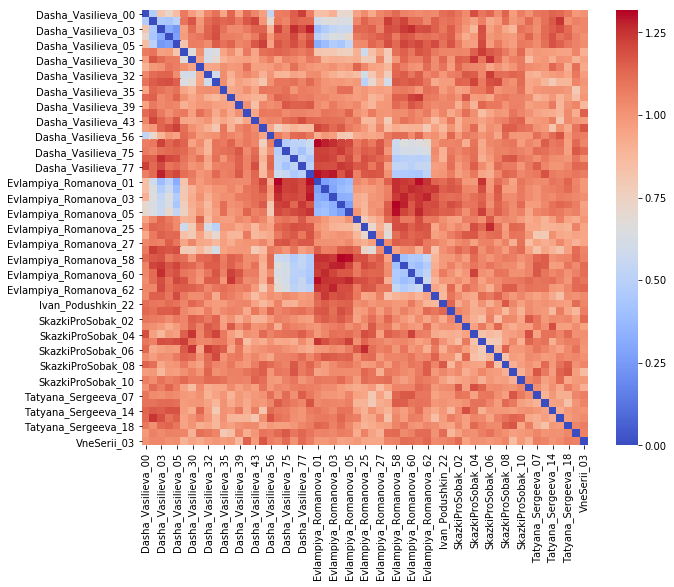

In [800]:
import seaborn
from matplotlib import pyplot

# берем данные и задаем лейблы

data = pd.read_csv('./distance_table_300mfw_0c.txt', sep = ' ')
DISTR_TITLE = 'Distributions of stylometric distances'
DIST_LABEL = 'Leskov and Unknown'

pyplot.figure(figsize=(10,8)) # рисуем температурную карту
seaborn.heatmap(data, cmap='coolwarm')

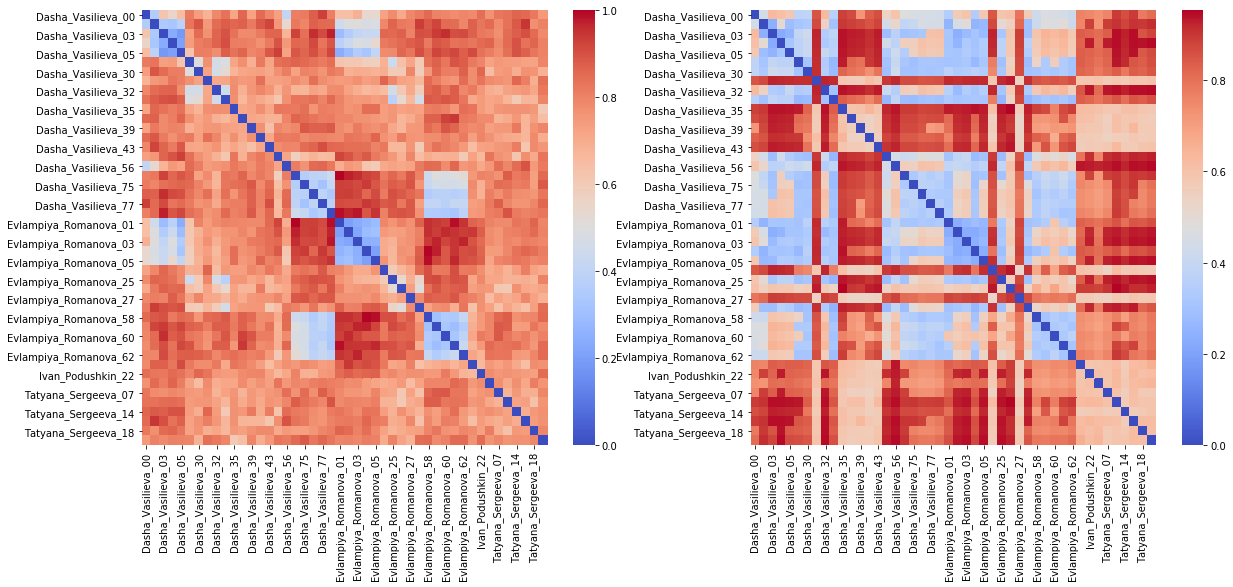

In [804]:
data_delta = pd.read_csv('./distance_table_300mfw_0c.txt', sep = ' ')
data_kmer = pd.read_csv('./kmer_4.csv', sep = ',',index_col=0)

labels_to_delete = ['SkazkiProSobak_01', 'SkazkiProSobak_02', 'SkazkiProSobak_03',
       'SkazkiProSobak_04', 'SkazkiProSobak_05', 'SkazkiProSobak_06',
       'SkazkiProSobak_07', 'SkazkiProSobak_08', 'SkazkiProSobak_09',
       'SkazkiProSobak_10','VneSerii_03']

data_delta_cut = data_delta.drop(columns=labels_to_delete,index=labels_to_delete)

dict_rename = dict(zip(data_kmer.columns,data_delta_cut.columns))
data_kmer.rename(columns=dict_rename,index=dict_rename,inplace=True)

min_delta = data_delta_cut.min().min()
max_delta = data_delta_cut.max().max()


data_delta_cut_minmaxed = (data_delta_cut-min_delta)/(max_delta-min_delta)

figure, axes = plt.subplots(1, 2,figsize=(20,8))
index = 0

seaborn.heatmap(data_delta_cut_minmaxed, cmap='coolwarm',ax=axes[0])
seaborn.heatmap(1-data_kmer, cmap='coolwarm',ax=axes[1])

1.3171649899071298

In [632]:
#To vectors

books_vecs_dataset = []

for key in books_freq_dict.keys():
    books_vecs_dataset.append(books_freq_dict[key])
books_vecs_dataset = np.array(books_vecs_dataset)


In [491]:
# Sets 

books_freq_sets = {}

N = 400

for key in books_freq_dict.keys():
    freq_keys = freq_dict.keys()
    freqs_sorted, words_sorted = (t for t in zip(*sorted(zip(books_freq_dict[key], list(freq_keys)),reverse=True)))
    
    books_freq_sets[key] = set(words_sorted[:N])



In [788]:
#serie = 'Dasha_Vasilieva_'
#serie = 'Evlampiya_Romanova_'
#serie = 'Viola_Tarakanova_'
#serie = 'Tatyana_Sergeeva_'
#serie = 'Stepanida_Kozlova_'
serie = 'Ivan_Podushkin_'

serie_indexes = ['01','02','03','04','05','06','07','08','09'] + [str(i) for i in range(10,40)]

#serie_indexes.remove('16')

#serie_indexes.remove('16')

set_difference = []

serie_length = len(serie_indexes)


#closest_pair
for i in range(0,serie_length-1):
    diff = len(books_freq_sets[serie+serie_indexes[i]] - books_freq_sets[serie+serie_indexes[i+1]])
    set_difference.append(diff)

    
#from 0th
#for i in range(0,serie_length-1):
#    diff = len(books_freq_sets[serie+serie_indexes[i]] - books_freq_sets[serie+serie_indexes[0]])
#    set_difference.append(diff)

    
#




## Correlation between closest books in series in time

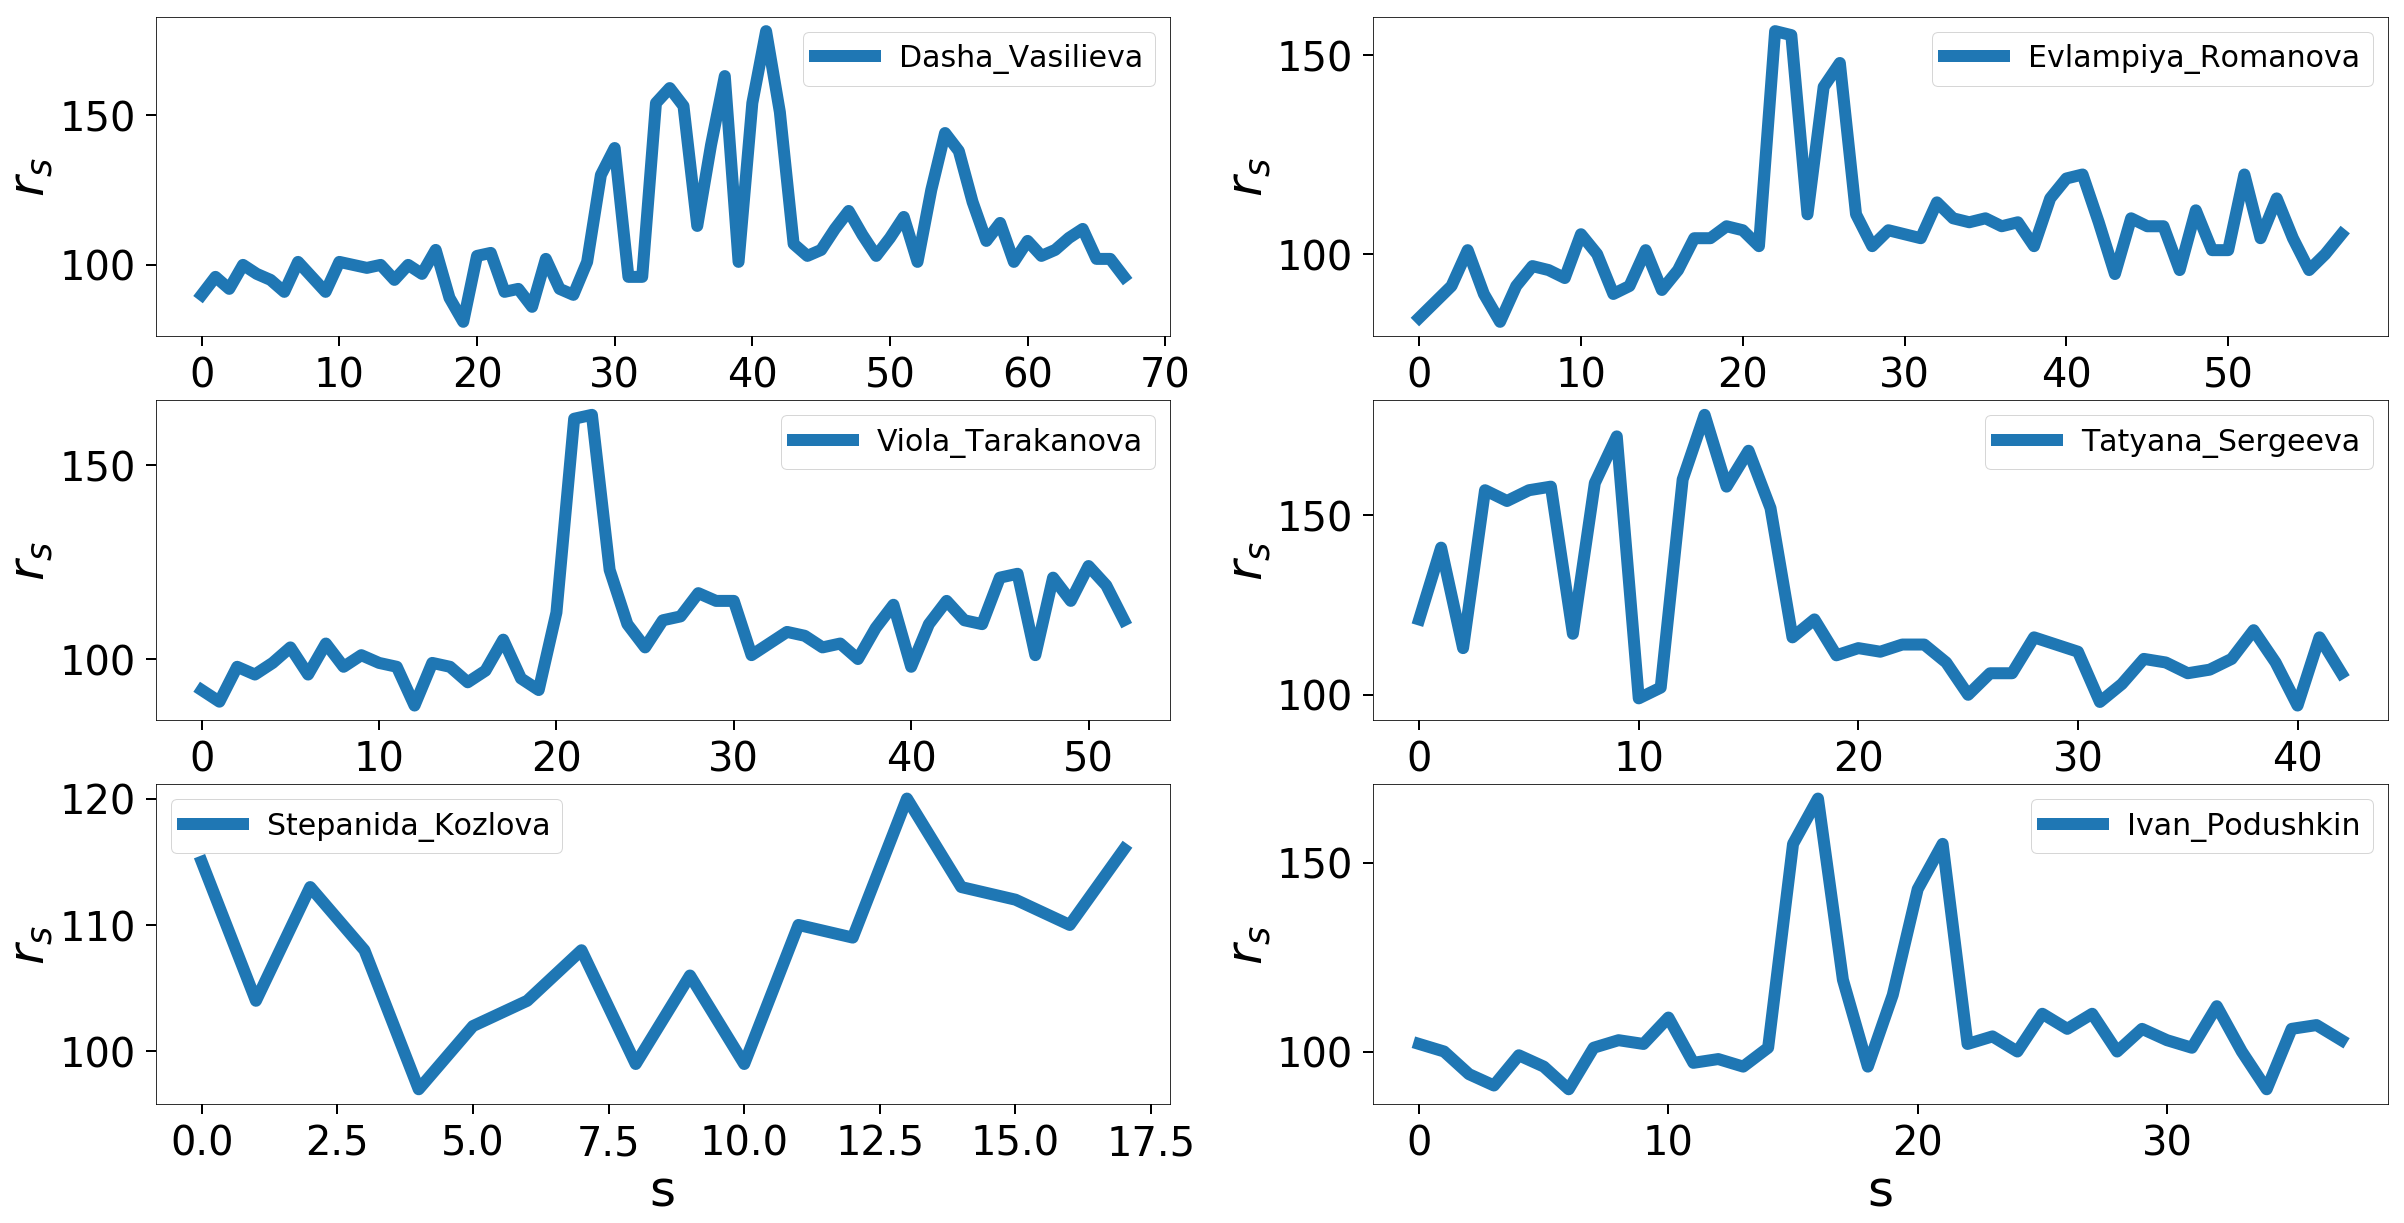

In [797]:



#fig = plt.figure(figsize=(40,20))
fig, axs = plt.subplots(3, 2,figsize=(40,20))

axs = axs.reshape(-1)


    
    
#serie = 'Dasha_Vasilieva_'
#serie = 'Evlampiya_Romanova_'
#serie = 'Viola_Tarakanova_'
#serie = 'Tatyana_Sergeeva_'
#serie = 'Stepanida_Kozlova_'
#serie = 'Ivan_Podushkin_'

axs[0].plot([i for i in range(0,serie_length1-1)],set_difference1,lw=12,label = 'Dasha_Vasilieva')
axs[1].plot([i for i in range(0,serie_length2-1)],set_difference2,lw=12,label = 'Evlampiya_Romanova')
axs[2].plot([i for i in range(0,serie_length3-1)],set_difference3,lw=12,label = 'Viola_Tarakanova')
axs[3].plot([i for i in range(0,serie_length4-1)],set_difference4,lw=12,label = 'Tatyana_Sergeeva')
axs[4].plot([i for i in range(0,serie_length5-1)],set_difference5,lw=12,label = 'Stepanida_Kozlova')
axs[5].plot([i for i in range(0,serie_length6-1)],set_difference6,lw=12,label = 'Ivan_Podushkin' )


for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=40,pad=10,length=10,width=2)
    ax.tick_params(axis='both', which='minor', labelsize=40,pad=10,length=5,width=2)
    ax.set_xlabel("s",fontsize=50)
    ax.set_ylabel("$r_s$", fontsize=50)
    ax.legend(fontsize=30)

#ax.plot(df_sq_d1_016['q'],df_sq_d1_016['b'],"-o",markersize=15,lw=12,label=r"$d1,DN=0.16$",markeredgewidth=0.1,markeredgecolor='black')
#ax.plot(df_sq_d1_025['q'],df_sq_d1_025['c'],"-o",markersize=15,lw=12,label=r"$d1,DN=0.25$",markeredgewidth=0.1,markeredgecolor='black')


#ax.errorbar(t,r2,er,fmt="--o",markersize=30,lw=12,label="T=0.8,D=0.8",markeredgewidth=5,markeredgecolor='black',capsize=10)
#ax.set_xlim((0.01,1))



#ax.axvspan(58, 110, facecolor='green', alpha=0.1)
#ax.axvspan(52, 58, facecolor='orange', alpha=0.1)
#ax.axvspan(30, 58, facecolor='purple', alpha=0.1)


#ax.set_xscale('log')
#ax.set_yscale('log')


#upperlimits = [True, False] * 5
#lowerlimits = [False, True] * 5
#plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             #label='subsets of uplims and lolims')

#plt.savefig("director_homo.png")


#plt.savefig("/Users/aleksandrbuglakov/Desktop/current_work/SIDE_DYNAMIC/result/melt/sq_wedge1_v1.png",bbox_inches='tight')


#plt.savefig("Evlampia_clos_pair.png")




In [583]:
s1,rs1 = rs_series('Dasha_Vasilieva_',75)
s2,rs2 = rs_series('Evlampiya_Romanova_',63)
s3,rs3 = rs_series('Viola_Tarakanova_',56)
s4,rs4 = rs_series('Stepanida_Kozlova_',20)
s5,rs5 = rs_series('Tatyana_Sergeeva_',46)
s6,rs6 = rs_series('Ivan_Podushkin_',41)

In [610]:
def axb(x,a,b):
    return a*(x)**b

## Difference between books in time series Rs. s - difference between book numbers   

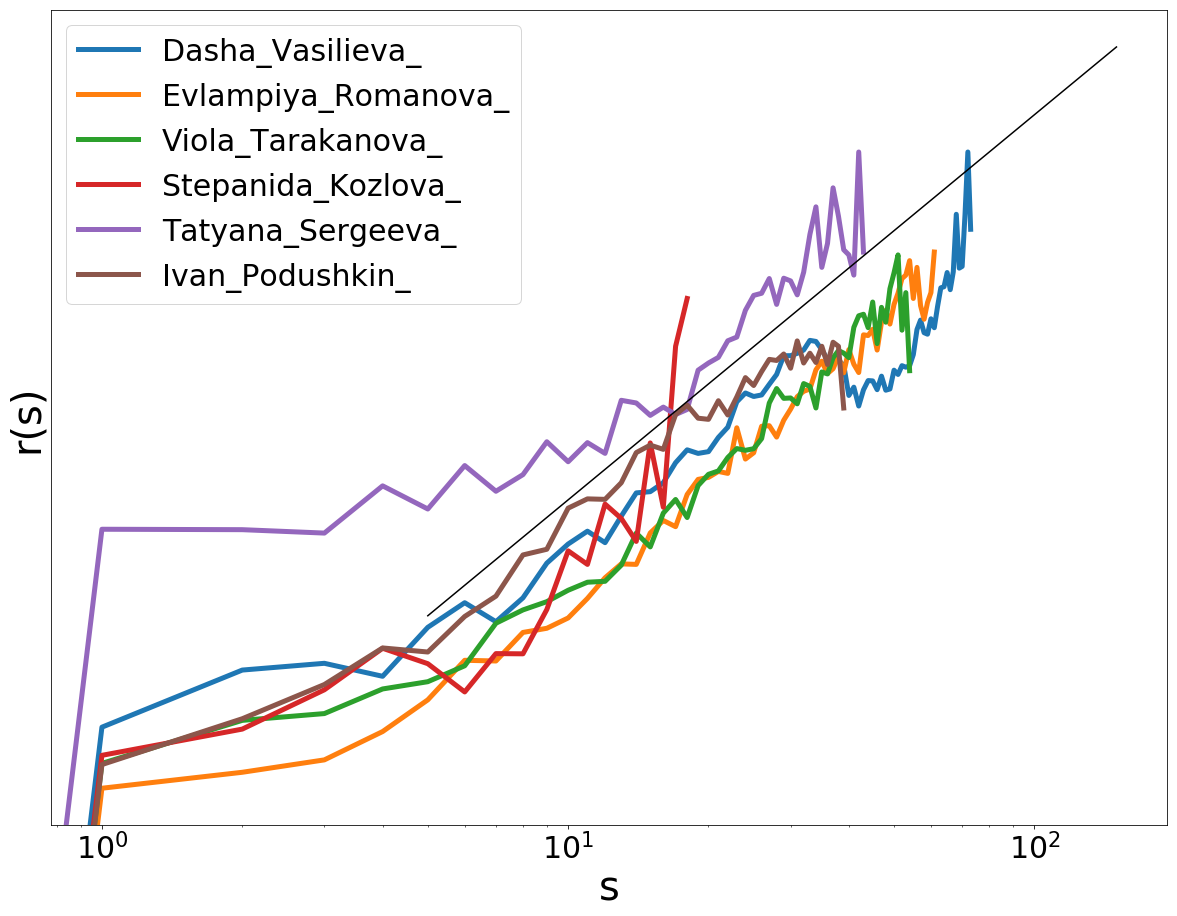

In [801]:
plt.figure(figsize=(20,15))

plt.plot(s1,rs1,lw=5,label='Dasha_Vasilieva_')
plt.plot(s2,rs2,lw=5,label='Evlampiya_Romanova_')
plt.plot(s3,rs3,lw=5,label='Viola_Tarakanova_')
plt.plot(s4,rs4,lw=5,label='Stepanida_Kozlova_')
plt.plot(s5,rs5,lw=5,label='Tatyana_Sergeeva_')
plt.plot(s6,rs6,lw=5,label='Ivan_Podushkin_')

plt.xlabel("s",fontsize=40)
plt.ylabel("r(s)",fontsize=40)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.legend(fontsize=30)

x = np.linspace(5,150,100)
y = axb(x,100,0.1)
plt.plot(x,y,color='black')

#plt.yscale("log")
plt.loglog()

plt.savefig("rs_Dasha.png")

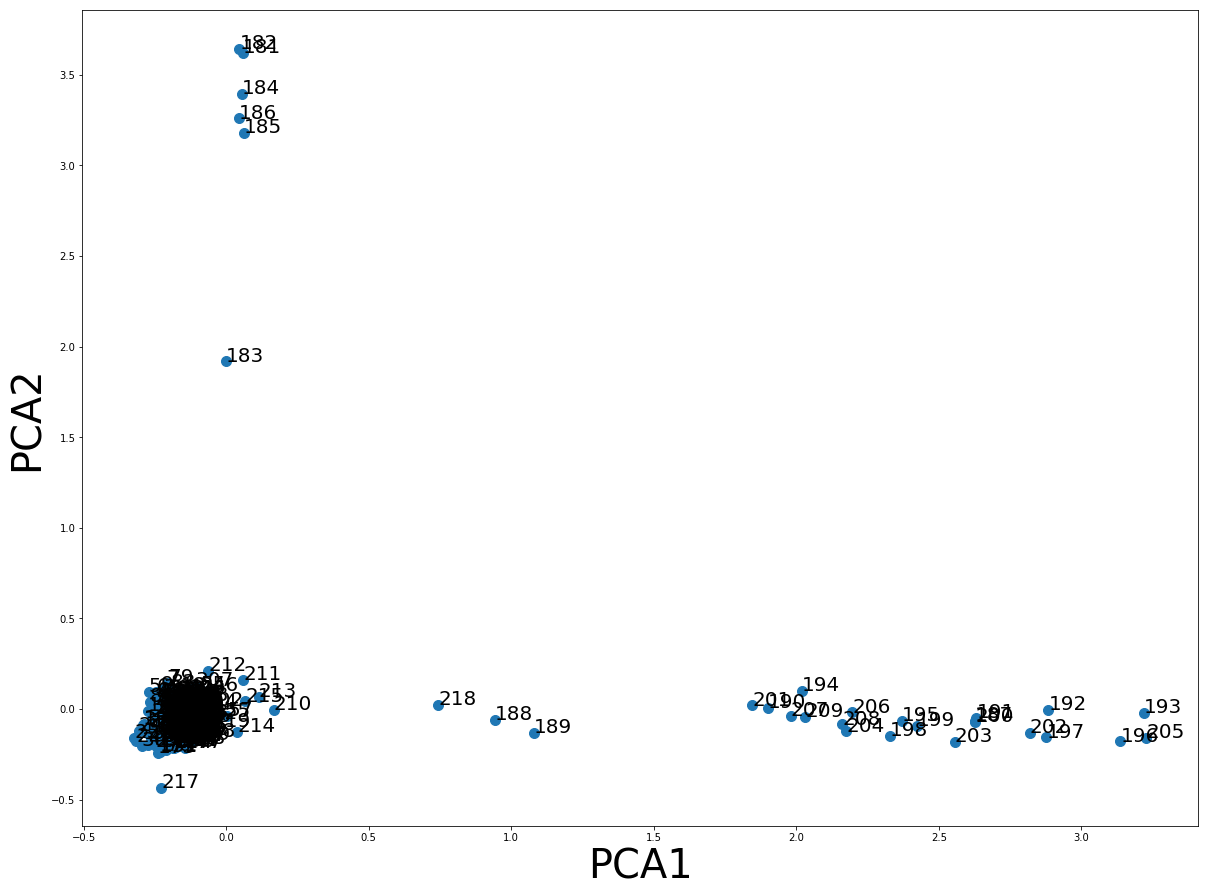

In [500]:
#PCA template

X = books_vecs_dataset
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)


X_transformed = pca.transform(X)

x = X_transformed[:,0]

y = X_transformed[:,1]

plt.figure(figsize=(20,15))

plt.scatter(x,y,s=100)

n = list(books_freq_dict.keys())

plt.xlabel("PCA1",fontsize=40)
plt.ylabel("PCA2",fontsize=40)

for i, txt in enumerate(n):
    plt.annotate(i, (x[i], y[i]),fontsize=20)
    
#plt.savefig("PCA_allDonscova.png")

In [311]:
books_freq_dict_normalized = {}

for key in books_freq_dict.keys():
    base_frequencies = np.array(books_freq_dict[key])
    normed_frequencies = base_frequencies/base_frequencies.sum()
    books_freq_dict_normalized[key] = normed_frequencies


<Figure size 1440x1080 with 0 Axes>

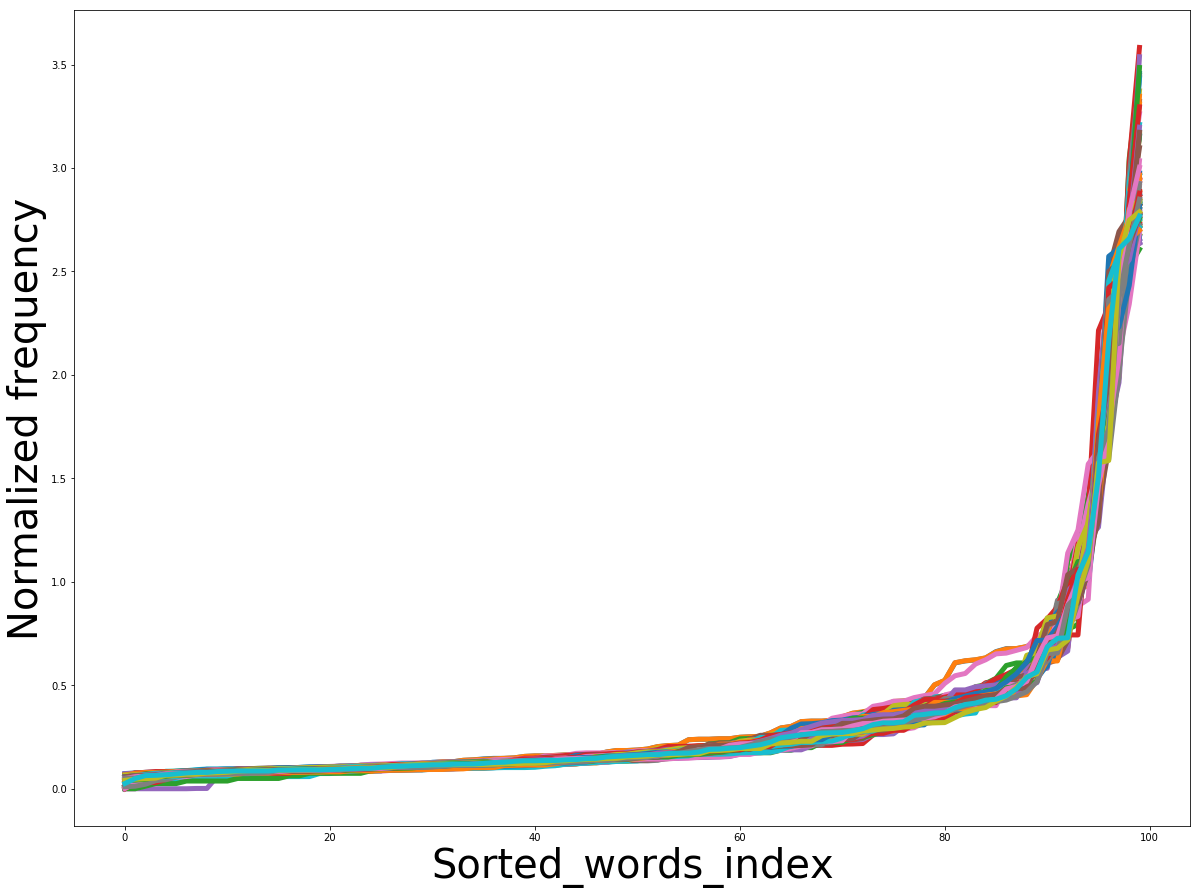

In [819]:
#k=40 #0,1,56 Dasha, 27 Evlampia

plt.figure(figsize=(20,15))

fig, axs = plt.subplots(figsize=(20,15))

ax.tick_params(axis='both', which='major', labelsize=40,pad=10,length=10,width=2)


for k in range(0,100):

    books_freq_dict[list(books_freq_dict)[k]].sort()
    plt.plot([i for i in range(len(books_freq_dict[list(books_freq_dict)[k]]))], books_freq_dict[list(books_freq_dict)[k]],label=list(books_freq_dict)[k],lw=5)
    #plt.plot([i for i in range(len(books_freq_dict_normalized[list(books_freq_dict_normalized)[k]]))], books_freq_dict_normalized[list(books_freq_dict_normalized)[k]],label=list(books_freq_dict_normalized)[k],lw=5)
    
#plt.legend(fontsize=30)

plt.xlabel("Sorted_words_index",fontsize=40)
plt.ylabel("Normalized frequency",fontsize=40)

#plt.yscale('log')
#plt.xscale('log')

plt.savefig("Spectra.png")

### Spectral clustering of Laplacian matrix, constructed from k-mer analysis

In [ ]:
all_clusters = []

for i in range(len(test)):

    print(i)
    
    filename_A = directory_path+"3-A-DontsovaDaria_Dasha_Vasilieva_" + test[i]+".txt.csv"
    filename_D = directory_path+"3-D-DontsovaDaria_Dasha_Vasilieva_" + test[i]+".txt.csv"
    
    df_A = pd.read_csv(filename_A)
    df_D = pd.read_csv(filename_D)
    
    df_A.drop(df_A.columns[0], axis=1, inplace=True)
    df_D.drop(df_D.columns[0], axis=1, inplace=True)
    
    cols = df_A.columns
    
    adjac_matrix = np.array(df_A)
    degree_matrix = np.array(df_D)
    
    L = adjac_matrix - degree_matrix
    
    n_clusters = 2
    
    
    labels = spectral_clustering(L, n_clusters)
    
    clusters = split_clusters(L,labels,cols)

    all_clusters.append(clusters)
    
    
all_clusters_sorted = []

for clust in all_clusters:
    lengths = []
    for j in range(len(clust)):
        lengths.append(len(clust[j]))
    lengths, clust = zip(*sorted(zip(lengths, clust),reverse=True))
    all_clusters_sorted.append(clust)
    
    
i = 0
mm = 2

sum_over_clusters = np.array([0.0 for i in range(len(test))])

for m in range(mm):
    for j in range(len(test)):
        metric = len(all_clusters_sorted[i][m] & all_clusters_sorted[j][m])/(len(all_clusters_sorted[i][m] | all_clusters_sorted[j][m])),test[j]
        print(metric)
        sum_over_clusters[j] += metric[0]
        


In [ ]:
for i,j in zip(test,sum_over_clusters):
    print(i,j)